In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import classification_report, confusion_matrix

## Testing data

In [2]:
# data that never been seen by the models
last_race = pd.read_csv('last_race.csv')
last_race

,race_id,won,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
0,6128,0.0,6,80,1,1078.0,133,11,99.0,19.0,...,1,0,1,0,0,0,0,0,0,0
1,6128,0.0,4,77,1,1110.0,130,8,13.0,2.9,...,1,0,1,0,0,0,0,0,0,0
2,6128,0.0,4,74,0,980.0,127,5,7.9,2.0,...,1,0,1,0,0,0,0,0,0,0
3,6128,1.0,3,73,1,1153.0,126,3,1.7,1.2,...,1,0,1,0,0,0,0,0,0,0
4,6128,0.0,4,73,1,1117.0,124,2,71.0,11.0,...,1,0,1,0,0,0,0,0,0,0
5,6128,0.0,3,70,1,1166.0,123,13,99.0,23.0,...,1,0,1,0,0,0,0,0,0,0
6,6128,0.0,4,70,1,1116.0,123,12,17.0,3.0,...,1,0,1,0,0,0,0,0,0,0
7,6128,0.0,4,68,1,1068.0,121,10,55.0,9.0,...,1,0,1,0,0,0,0,0,0,0
8,6128,0.0,4,67,1,1091.0,118,1,7.9,2.0,...,1,0,1,0,0,0,0,0,0,0
9,6128,0.0,4,65,0,1141.0,116,4,33.0,5.7,...,1,0,1,0,0,0,0,0,0,0


In [3]:
# drop unnecessary columns & define data and labels
X_deploy = last_race.drop(columns=['race_id', 'won'])
y_deploy = last_race.won

## Load kNN model trained with original data

In [4]:
knn = joblib.load('knn_original_data.pkl')

In [5]:
predictions = knn.predict(X_deploy)
print(classification_report(y_deploy, predictions))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        13
         1.0       0.00      0.00      0.00         1

    accuracy                           0.93        14
   macro avg       0.46      0.50      0.48        14
weighted avg       0.86      0.93      0.89        14



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Only class 0 (lose) can be predicted. 

## Load kNN model trained with under-sampled data

In [6]:
knn = joblib.load('knn_rus.pkl')

In [7]:
predictions = knn.predict(X_deploy)
print(classification_report(y_deploy, predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        13
         1.0       0.50      1.00      0.67         1

    accuracy                           0.93        14
   macro avg       0.75      0.96      0.81        14
weighted avg       0.96      0.93      0.94        14



kNN model trained with under-sampled data can predict the winning horse. However, there is also one False Positive in the prediction. 

Text(0, 0.5, 'Actual')

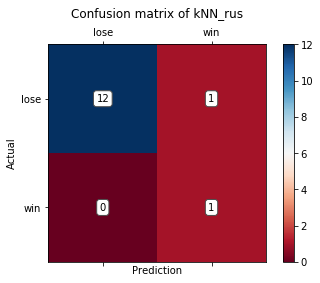

In [12]:
data = confusion_matrix(y_deploy, predictions)

fig, ax = plt.subplots()
cax = ax.matshow(data, cmap='RdBu')

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
plt.title('Confusion matrix of kNN_rus', y=1.1)
fig.colorbar(cax)
labels = ['lose', 'win']
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Prediction')
plt.ylabel('Actual')

## Load kNN model trained with over-sampled data

In [17]:
knn = joblib.load('knn_sm.pkl')

In [18]:
predictions = knn.predict(X_deploy)
print(classification_report(y_deploy, predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        13
         1.0       0.00      0.00      0.00         1

    accuracy                           0.86        14
   macro avg       0.46      0.46      0.46        14
weighted avg       0.86      0.86      0.86        14



Only class 0 (lose) can be predicted.

## Load LightGBM models

In [13]:
# LightGBM model trained with original data
lgb = joblib.load('lgb_original_data.pkl')

/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [28]:
# LightGBM model trained with under-sampled data
lgb_rus = joblib.load('lgb_rus.pkl')

In [32]:
# LightGBM model trained with over-sampled data
lgb_sm = joblib.load('lgb_sm.pkl')

## Set threshold values same as the training models

In [57]:
predictions = lgb.predict(X_deploy)
#convert into binary values
for i in range(14):
    if predictions[i] >= 0.0995:       # setting threshold 
        predictions[i] = 1
    else:  
        predictions[i] = 0

In [29]:
predictions_rus = lgb_rus.predict(X_deploy)
#convert into binary values
for i in range(14):
    if predictions_rus[i] >= 0.55:       # setting threshold 
        predictions_rus[i] = 1
    else:  
        predictions_rus[i] = 0

In [33]:
predictions_sm = lgb_sm.predict(X_deploy)
#convert into binary values
for i in range(14):
    if predictions_sm[i] >= 0.5:       # setting threshold 
        predictions_sm[i] = 1
    else:  
        predictions_sm[i] = 0

## Predictions of the LightGBM models

In [30]:
print(classification_report(y_deploy, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [34]:
print(classification_report(y_deploy, predictions_rus))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [58]:
print(classification_report(y_deploy, predictions_sm))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



All LightGBM models can achieve 100% accuracy rate. 

Text(0, 0.5, 'Actual')

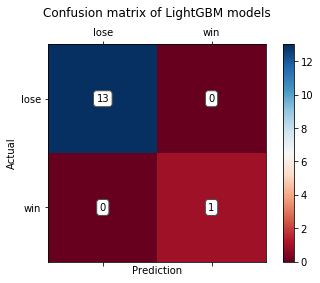

In [63]:
data = confusion_matrix(y_deploy, predictions)

fig, ax = plt.subplots()
cax = ax.matshow(data, cmap='RdBu')

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
plt.title('Confusion matrix of LightGBM models', y=1.1)
fig.colorbar(cax)
labels = ['lose', 'win']
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Prediction')
plt.ylabel('Actual')

## Conclusions:
For KNeighborsClassifier, only model trained with under-sampled data can predict both class 0 and class 1 (with one False Positive error). The original data model and over-sampling model can only predict class 0.  <br/>
LightGBM models can predict all data correctly, even using the model trained with skewed dataset (by tuning the threshold value). 

Confusion matrix plot code reference from [Stack Overflow](https://stackoverflow.com/questions/20998083/show-the-values-in-the-grid-using-matplotlib) user Joe Kington. Thank you for sharing your experience! =]